In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import datetime

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('data.who.csv',index_col=0)

In [3]:
data.head()

,infected
date,
2020-01-20,282
2020-01-21,314
2020-01-22,579
2020-01-23,581
2020-01-24,846


In [4]:
data.tail()

,infected
date,
2020-03-03,90870
2020-03-04,93091
2020-03-05,95324
2020-03-06,98192
2020-03-07,101927


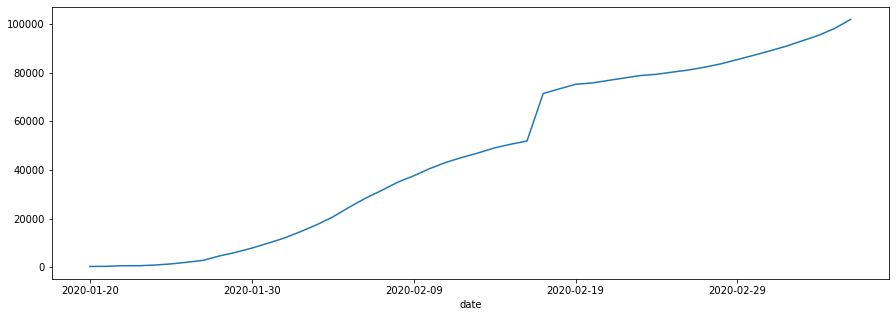

In [5]:
data.infected.plot(figsize=(15, 5))

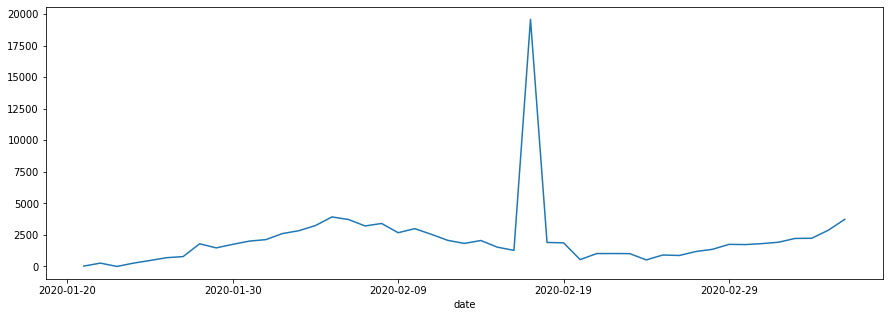

In [6]:
(data.infected - data.infected.shift(1)).plot(figsize=(15, 5))

In [7]:
from pyramid.arima import auto_arima

In [8]:
stepwise_model = auto_arima(data,
                            seasonal=False,
                            trace=True,
                            error_action='ignore',  
                            suppress_warnings=True, 
                            stepwise=True)

Fit ARIMA: order=(2, 1, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0); AIC=882.051, BIC=885.751, Fit time=0.014 seconds
Fit ARIMA: order=(1, 1, 0); AIC=883.797, BIC=889.347, Fit time=0.460 seconds
Fit ARIMA: order=(0, 1, 1); AIC=883.827, BIC=889.377, Fit time=0.085 seconds
Fit ARIMA: order=(1, 1, 1); AIC=885.234, BIC=892.634, Fit time=1.252 seconds
Total fit time: 2.612 seconds


In [9]:
stepwise_model.aic()

882.0506929232278

In [10]:
stepwise_model.fit(data)

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(0, 1, 0),
      out_of_sample_size=0, scoring='mse', scoring_args={}, seasonal_order=None,
      solver='lbfgs', start_params=None, suppress_warnings=True,
      transparams=True, trend='c')

In [11]:
predicted_days = 60
firstPredictionDay = datetime.datetime(2020,3,8)

In [12]:
future_forecast = stepwise_model.predict(n_periods=predicted_days)

In [13]:
for x in range (0, predicted_days):
    print(str(firstPredictionDay + datetime.timedelta(days = x))[0:10] + " - " +str(int(future_forecast[x])))

2020-03-08 - 104089
2020-03-09 - 106252
2020-03-10 - 108414
2020-03-11 - 110577
2020-03-12 - 112740
2020-03-13 - 114902
2020-03-14 - 117065
2020-03-15 - 119228
2020-03-16 - 121390
2020-03-17 - 123553
2020-03-18 - 125716
2020-03-19 - 127878
2020-03-20 - 130041
2020-03-21 - 132204
2020-03-22 - 134366
2020-03-23 - 136529
2020-03-24 - 138692
2020-03-25 - 140854
2020-03-26 - 143017
2020-03-27 - 145180
2020-03-28 - 147342
2020-03-29 - 149505
2020-03-30 - 151668
2020-03-31 - 153830
2020-04-01 - 155993
2020-04-02 - 158156
2020-04-03 - 160318
2020-04-04 - 162481
2020-04-05 - 164644
2020-04-06 - 166806
2020-04-07 - 168969
2020-04-08 - 171132
2020-04-09 - 173294
2020-04-10 - 175457
2020-04-11 - 177620
2020-04-12 - 179782
2020-04-13 - 181945
2020-04-14 - 184108
2020-04-15 - 186270
2020-04-16 - 188433
2020-04-17 - 190596
2020-04-18 - 192758
2020-04-19 - 194921
2020-04-20 - 197084
2020-04-21 - 199246
2020-04-22 - 201409
2020-04-23 - 203572
2020-04-24 - 205734
2020-04-25 - 207897
2020-04-26 - 210059
